In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-prices/BTC-USD.csv
/kaggle/input/bitcoin-tweets-2021-2022/bitcoin-tweets-2022.csv
/kaggle/input/bitcoin-tweets-2021-2022/bitcoin-tweets-2021.csv


# Dataset Loading

In [6]:
chunk1 = pd.read_csv('/kaggle/input/bitcoin-tweets-2021-2022/bitcoin-tweets-2021.csv',chunksize=100000,lineterminator='\n')
df1 = pd.concat(chunk1) 
chunk2 = pd.read_csv('/kaggle/input/bitcoin-tweets-2021-2022/bitcoin-tweets-2022.csv',chunksize=100000,lineterminator='\n')
df2 = pd.concat(chunk2)

In [7]:
print("First 5 values of df1")
(df1.head())

First 5 values of df1


,datetime,username,text
0,2021-01-01 23:59:58+00:00,WoodooProd,Crypto adoption in 2021: Top trends and predic...
1,2021-01-01 23:59:53+00:00,YSojourners,Ripple Executive Says US Laws on Crypto Are Va...
2,2021-01-01 23:59:53+00:00,Andama_n,@hextoysofficial | https://t.co/C6LPpuq05n Are...
3,2021-01-01 23:59:51+00:00,YSojourners,FUN and Games: Altcoin Drastically Pumps And D...
4,2021-01-01 23:59:50+00:00,HunnerSa,I bought #Bitcoin at 6k-8k-9k-12k-16k-19k and ...


In [8]:
print("First 5 values of df2")
(df2.head())

First 5 values of df2


,datetime,date,username,text
0,2022-01-01 23:59:56+00:00,2022-01-01,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...
1,2022-01-01 23:59:53+00:00,2022-01-01,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...
2,2022-01-01 23:59:43+00:00,2022-01-01,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...
3,2022-01-01 23:59:35+00:00,2022-01-01,robert54177167,If your interested in losing money in 2022 kee...
4,2022-01-01 23:59:34+00:00,2022-01-01,WorldCoinIndex,Bitcoin price index https://t.co/o7UcHJUhC6 #U...


In [9]:
#dropping the date column in df2 
columns_to_drop = ['date']
df2.drop(columns=columns_to_drop, inplace=True)

In [10]:
#combining both the dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

In [11]:
#deleting the df1 and df2 to in order to release memory
del df1
del df2

In [12]:
# Converting the datetime column to datetime format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime']).dt.date

# Sorting the DataFrame by the datetime column
combined_df = combined_df.sort_values(by='datetime') 

# Define the start and end dates of the range as per our news dataset
start_date = pd.Timestamp('2021-02-05')
end_date = pd.Timestamp('2022-06-30')

In [13]:
# Convert the datetime column to datetime format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Filter the DataFrame to include only rows within the date range
date_filtered_df = combined_df[(combined_df['datetime'] >= start_date) & (combined_df['datetime'] <= end_date)]

In [14]:
del combined_df

In [15]:
#checking for null values
date_filtered_df.isnull().sum()

datetime    0
username    1
text        0
dtype: int64

In [16]:
# Finding rows with null values in the 'username' column
null_username_rows = date_filtered_df[date_filtered_df['username'].isnull()]

# Display the rows with null values in the 'username' column
print(null_username_rows)

          datetime username                                               text
5567932 2021-05-07      NaN  A very cool story of using energy that’s being...


In [17]:
#Dropping the username column
columns_to_drop = ['username']
date_filtered_df.drop(columns=columns_to_drop, inplace=True)

In [18]:
#getting the count of tweets per day we have in our dataset
tweets_per_date = date_filtered_df.groupby('datetime').size().reset_index(name='tweet_count')

In [19]:
tweets_per_date.head()

,datetime,tweet_count
0,2021-02-05,44800
1,2021-02-06,43727
2,2021-02-07,38218
3,2021-02-08,97746
4,2021-02-09,72670


In [20]:
#minimum and maximum tweet for any day we have in our dataset.
min_value = tweets_per_date['tweet_count'].min()
max_value = tweets_per_date['tweet_count'].max()
print("Minimum tweet for any day is ", min_value)
print("Maximum tweet for any day is ", max_value)

Minimum tweet for any day is  17200
Maximum tweet for any day is  137130


In [21]:
sampled_tweets = date_filtered_df.groupby('datetime', as_index=False).apply(lambda x: x.sample(n=100)).reset_index(drop=True)

/tmp/ipykernel_33/367122579.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_tweets = date_filtered_df.groupby('datetime', as_index=False).apply(lambda x: x.sample(n=100)).reset_index(drop=True)


In [22]:
# Sort the DataFrame by the date column
sampled_tweets = sampled_tweets.sort_values(by='datetime')

In [23]:
sampled_tweets['datetime'].value_counts().sort_index()

datetime
2021-02-05    100
2021-02-06    100
2021-02-07    100
2021-02-08    100
2021-02-09    100
             ... 
2022-06-26    100
2022-06-27    100
2022-06-28    100
2022-06-29    100
2022-06-30    100
Name: count, Length: 511, dtype: int64

In [24]:
for i in range(0,10):
    print(sampled_tweets['text'].iloc[i])

Damn looking at the giant jumps bitcoin makes every so often, i hope in like 5-10 years doge jumps to 1k if this shit hit 10k id be filthy rich,  i could pay off all my loans, buy property,  start education websites and then literally just spend mad time doing a hobby like astro
Little ideas like Brexit, Socialism or Bitcoin are nothing compared to the idea of a Cislunar economy or a multi-planetary humanity.

Serious people like Elon Musk, Jeff Bezos and Gerard O’Niel are all offering some tantalising ideas that will improve life for all. https://t.co/PWtncCdeE1
@_SirWilliam_ @UchePOkoye You guys are missing the point the main reason of them banning Bitcoin is that it's favoures more youth's from southern nigeria.
$EOS dumping because lead developer quit. 

$ETH will dump if @VitalikButerin quits.

Same for most single leader crypto projects. 

$BTC is leaderless.

$XTZ have collective leadership, everyone picks responsibility.

#TEZOS $XTZ #CRYPTO #DeFi  #Bitcoin  @ForbesCrypto
I wan

# Text Preprocessing & Feature Engineering

In [25]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def contx_to_exp(text):
  for key in apostrophe_dict:
    value = apostrophe_dict[key]
    text = text.replace(key, value)
    return text

In [26]:
# Emotion detection by different symbols
emotion_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

def emotion_check(text):
  for key in emotion_dict:
    value = emotion_dict[key]
    text = text.replace(key, value)
    return text

I will use regex to handle some of the unwanted text, such as urls and Twitter handles.

In [27]:
def clean_text(text):
  text = re.sub(r'https?:\/\/\S*'," ", text) # Removing the url from the text
  text = re.sub(r'@\S+', " ", text) # Removing twitter handles from the text
  text = re.sub('#'," ", text) # removing # from the data
  text = re.sub(r'RT', "", text) # Removing the Re-tweet mark
  text = re.sub(r"\s+"," ", text)  # Removing Extra Spaces
  text = text.lower()
  return text

#removes pattern in the input text
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt.lower()

In [28]:
# Define a regular expression pattern to match Twitter handles
pattern = r'@[\w]+'

# Apply the remove_pattern function to the 'text' column using apply
sampled_tweets['clean_tweet'] = sampled_tweets['text'].apply(lambda x: remove_pattern(x, pattern))

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to perform text preprocessing
def preprocess_text(text):
    
    text = clean_text(text)
    
    # Convert contractions to expansions
    text = contx_to_exp(text)
    
    # Perform emotion check
    text = emotion_check(text)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Remove short words
    text = " ".join([w for w in text.split() if len(w) > 3])
    
    # Remove stopwords
    text_tokens = word_tokenize(text)
    text = " ".join([word for word in text_tokens if word.lower() not in stop_words])
    
    # Remove everything other than text
    text = re.sub(r'[^\w\s]', ' ', text)  # Replacing Punctuations with space
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Replacing all the things with space other than text
    text = re.sub(r"\s+", " ", text)  # Removing extra spaces
    
    return text

# Apply the preprocessing function to the 'clean_tweet' column
sampled_tweets['clean_tweet'] = sampled_tweets['clean_tweet'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


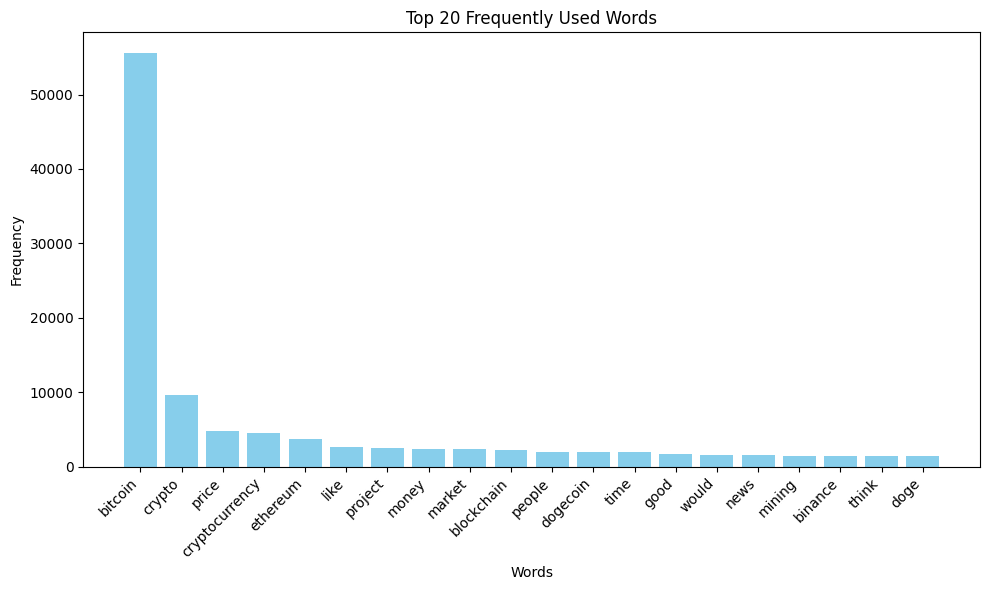

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Assuming you have already performed preprocessing and have your dataframe ready
# Let's say your dataframe is named 'df'

# Tokenize the clean text
tokenized_text = [word for sublist in sampled_tweets['clean_tweet'].apply(word_tokenize) for word in sublist]

# Count the frequency of each word
word_freq = Counter(tokenized_text)

# Get the top 20 words
top_words = word_freq.most_common(20)

# Extract words and their frequencies
words, freqs = zip(*top_words)

# Plot the top 20 words
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Frequently Used Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  
from nltk.corpus import wordnet as wn
nltk.download('wordnet2022')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


<h1>Calculating Sentiment Polarity, Subjectivity and Compound Score</h1>
<ul>
    <li>The subjectivity shows how subjective or objective a statement is.
    <li>The polarity shows how positive/negative the statement is, a value equal to 1 means the statement is positive, a value equal to 0 means the statement is neutral and a value of -1 means the statement is negative.
</ul>

In [32]:
from textblob import TextBlob     # for performing NLP Functions i.e detection of Polarity and Subjectivity

polarity=[]     #list that contains polarity of tweets
subjectivity=[]    ##list that contains subjectivity of tweets

for i in sampled_tweets.clean_tweet.values:
    try:
        analysis = TextBlob(i) # [i] records to the first data in dataset
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)
        
# adding sentiment polarity and subjectivity column to dataframe

sampled_tweets['polarity'] = polarity
sampled_tweets['subjectivity'] = subjectivity
sampled_tweets.head()

,datetime,text,clean_tweet,polarity,subjectivity
0,2021-02-05,Damn looking at the giant jumps bitcoin makes ...,damn looking giant jumps bitcoin makes every o...,-0.156250,0.887500
72,2021-02-05,"Little ideas like Brexit, Socialism or Bitcoin...",little ideas like brexit socialism bitcoin not...,-0.260417,0.583333
71,2021-02-05,@_SirWilliam_ @UchePOkoye You guys are missing...,guys missing point main reason banning bitcoin...,-0.011111,0.127778
70,2021-02-05,$EOS dumping because lead developer quit. \n\n...,dumping lead developer quit dump quits single ...,-0.071429,0.214286
69,2021-02-05,I wanna start seeing some etherium/Bitcoin exp...,wan na start seeing etherium bitcoin exposure ...,-0.300000,0.375000


<h3>To create a function :</h3>
<ul>
<li>to get sentiment scores (neg, pos, neu, & compound).</li>
The compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between
<li>-1(most extreme negative) and +1 (most extreme positive).</li>
Pos is the positive percentage score, neg is the negative percentage score, and neu is the neutral percentage score.
<h3>The total for %pos + %neg + %neu = 100%</h3>

In [33]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
#Create a function to get the sentiment scores (using Sentiment Intensity Analyzer)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [35]:
#Get the sentiment scores 
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(sampled_tweets['clean_tweet'])):
    SIA = getSIA(sampled_tweets['clean_tweet'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [36]:
#Store the sentiment scores in the data frame
sampled_tweets['Compound'] = compound
sampled_tweets['Negative'] = neg
sampled_tweets['Neutral'] = neu
sampled_tweets['Positive'] = pos

In [37]:
sampled_tweets.head()

,datetime,text,clean_tweet,polarity,subjectivity,Compound,Negative,Neutral,Positive
0,2021-02-05,Damn looking at the giant jumps bitcoin makes ...,damn looking giant jumps bitcoin makes every o...,-0.156250,0.887500,0.6369,0.158,0.553,0.289
72,2021-02-05,"Little ideas like Brexit, Socialism or Bitcoin...",little ideas like brexit socialism bitcoin not...,-0.260417,0.583333,0.0000,0.000,1.000,0.000
71,2021-02-05,@_SirWilliam_ @UchePOkoye You guys are missing...,guys missing point main reason banning bitcoin...,-0.011111,0.127778,0.6369,0.000,0.656,0.344
70,2021-02-05,$EOS dumping because lead developer quit. \n\n...,dumping lead developer quit dump quits single ...,-0.071429,0.214286,0.0000,0.000,1.000,0.000
69,2021-02-05,I wanna start seeing some etherium/Bitcoin exp...,wan na start seeing etherium bitcoin exposure ...,-0.300000,0.375000,0.0000,0.000,1.000,0.000


In [38]:
sampled_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51100 entries, 0 to 51099
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      51100 non-null  datetime64[ns]
 1   text          51100 non-null  object        
 2   clean_tweet   51100 non-null  object        
 3   polarity      51100 non-null  float64       
 4   subjectivity  51100 non-null  float64       
 5   Compound      51100 non-null  float64       
 6   Negative      51100 non-null  float64       
 7   Neutral       51100 non-null  float64       
 8   Positive      51100 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 5.9+ MB


In [39]:
df_with_sentiments = sampled_tweets[['datetime', 'polarity', 'subjectivity', 'Compound', 'Negative', 'Neutral','Positive']]

# Combining rows for dates with multiple entries, to ensure each date has single entry.

In [40]:
# Group by 'datetime' and calculate the mean of other columns
grouped_df = df_with_sentiments.groupby('datetime').mean().reset_index()

In [41]:
# Assuming your DataFrame is named df and the column you want to find min and max values for is named 'column_name'
min_value_polarity = grouped_df['polarity'].min()
max_value_polarity = grouped_df['polarity'].max()

# Display the minimum and maximum values
print("Minimum value:", min_value_polarity)
print("Maximum value:", max_value_polarity)

Minimum value: -0.006583856421356421
Maximum value: 0.18463484848484848


In [42]:
mean_polarity = 0
mean_compound = 0
for i in range(0,len(grouped_df)):
    mean_polarity += grouped_df['polarity'].iloc[i] 
    mean_compound += grouped_df['Compound'].iloc[i]
    
mean_polarity = mean_polarity/len(grouped_df)
mean_compound = mean_compound/len(grouped_df)

In [43]:
print(mean_polarity)
print(mean_compound)

0.09208005762881417
0.16389186105675152


In [44]:
grouped_df['polarity'] = grouped_df['polarity'] - mean_polarity 
grouped_df['Compound'] = grouped_df['Compound'] - mean_compound

In [45]:
# Assuming your DataFrame is named df and the column you want to find min and max values for is named 'column_name'
min_value_polarity = grouped_df['polarity'].min()
max_value_polarity = grouped_df['polarity'].max()

# Display the minimum and maximum values
print("Minimum value:", min_value_polarity)
print("Maximum value:", max_value_polarity)

Minimum value: -0.0986639140501706
Maximum value: 0.09255479085603431


In [46]:
# Assuming your DataFrame is named df and the column you want to find min and max values for is named 'column_name'
min_value_compound = grouped_df['Compound'].min()
max_value_compound = grouped_df['Compound'].max()

# Display the minimum and maximum values
print("Minimum value:", min_value_compound)
print("Maximum value:", max_value_compound)

Minimum value: -0.17181386105675153
Maximum value: 0.19518313894324846


In [47]:
pos_mean_polarity = 0;
count_pos_polarity = 0;
count_neg_polarity = 0;
neg_mean_polarity = 0;
for i in range(0,len(grouped_df)):
    val = grouped_df['polarity'].iloc[i]
    if(val>0):
        pos_mean_polarity += val
        count_pos_polarity += 1
    else:
        neg_mean_polarity += val
        count_neg_polarity += 1
pos_mean_polarity = pos_mean_polarity/count_pos_polarity
neg_mean_polarity = neg_mean_polarity/count_neg_polarity

In [48]:
pos_mean_compound = 0;
count_pos_compound = 0;
count_neg_compound = 0;
neg_mean_compound = 0;
for i in range(0,len(grouped_df)):
    val = grouped_df['Compound'].iloc[i]
    if(val>0):
        pos_mean_compound += val
        count_pos_compound += 1
    else:
        neg_mean_compound += val
        count_neg_compound += 1
pos_mean_compound = pos_mean_compound/count_pos_compound
neg_mean_compound = neg_mean_compound/count_neg_compound

In [49]:
for i in range(len(grouped_df)):
    val1 = grouped_df['polarity'].iloc[i]
    val2 = grouped_df['Compound'].iloc[i] 
    if(val1 >= neg_mean_polarity and val1 <= pos_mean_polarity):
        grouped_df.loc[i, 'polarity'] = 0
    if(val2 >= neg_mean_compound and val2 <= pos_mean_compound):
        grouped_df.loc[i, 'Compound'] = 0

<h3>Visualization of distribution of sentiments.</h3>

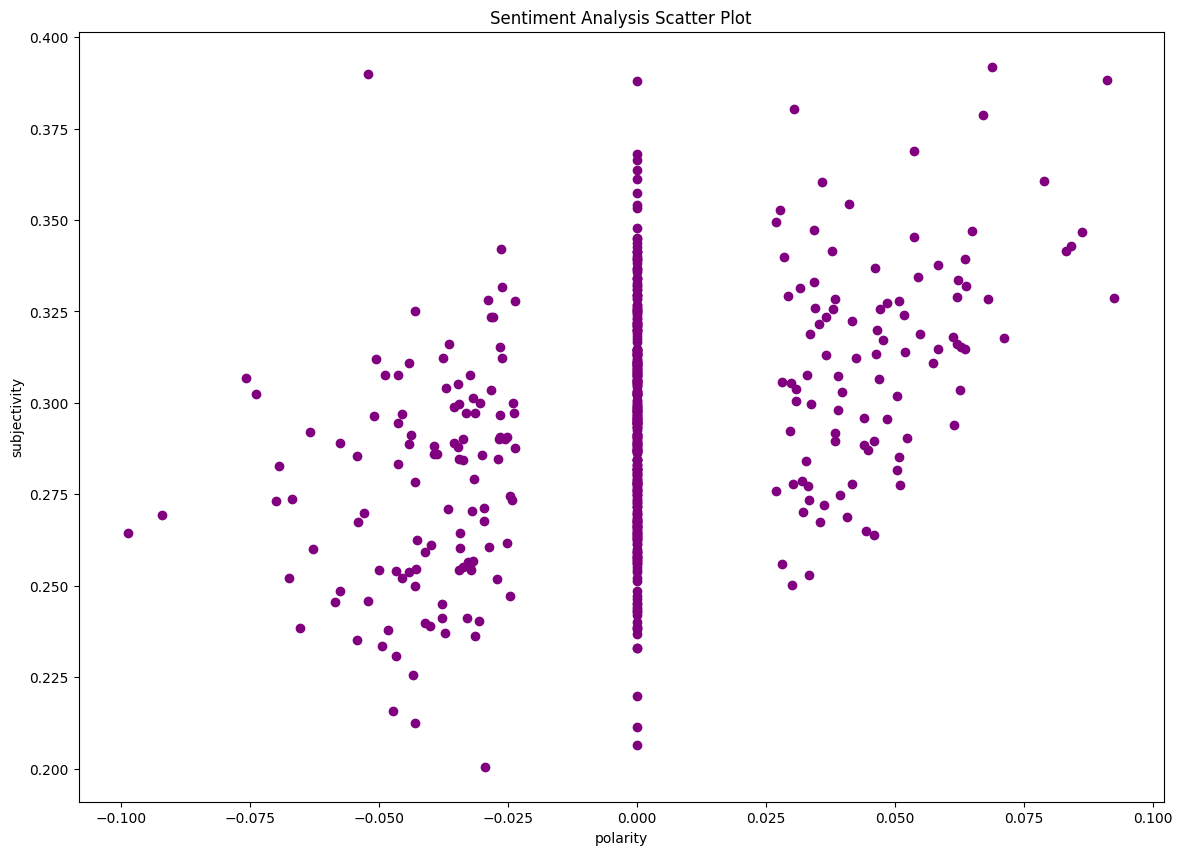

In [50]:
# scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(grouped_df.shape[0]):
    plt.scatter(grouped_df["polarity"].iloc[[i]].values[0], grouped_df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

<h2>Predicting bitcoin prices using twitter sentiments to get the optimal weights.

In [51]:
prices_df = pd.read_csv('/kaggle/input/bitcoin-historical-prices/BTC-USD.csv')
sentiment_df = grouped_df

In [52]:
print(prices_df['Date'].min())
print(prices_df['Date'].max())

2021-02-06
2022-07-01


In [53]:
print(grouped_df['datetime'].min())
print(grouped_df['datetime'].max())

2021-02-05 00:00:00
2022-06-30 00:00:00


In [54]:
prices_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [55]:
sentiment_df.columns

Index(['datetime', 'polarity', 'subjectivity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [56]:
prices_df = pd.DataFrame(data=prices_df[['Date','Open','High','Low','Close','Volume']], columns=['Date','Open','High','Low','Close','Volume'])

In [57]:
import pandas as pd

# Select columns from the first DataFrame
df1_selected = sentiment_df[['polarity', 'subjectivity', 'Compound']]

# Select columns from the second DataFrame
df2_selected = prices_df[['Date','Open', 'Close']]

In [58]:
# Merge the selected columns
final_df = pd.merge(df2_selected, df1_selected, left_index=True, right_index=True)

In [59]:
final_df.head()

,Date,Open,Close,polarity,subjectivity,Compound
0,2021-02-06,38138.386719,39266.011719,-0.039315,0.288097,-0.056199
1,2021-02-07,39250.191406,38903.441406,-0.033689,0.290087,-0.050112
2,2021-02-08,38886.828125,46196.464844,0.000000,0.284624,0.000000
3,2021-02-09,46184.992188,46481.105469,0.000000,0.294519,0.000000
4,2021-02-10,46469.761719,44918.183594,0.000000,0.296528,0.000000


Scaling the data to make the range of all features same.

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataset is stored in a pandas DataFrame named 'df'
data_to_scale = final_df[['Open', 'polarity', 'subjectivity', 'Compound']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)

#Change
scaler2 = MinMaxScaler()
final_df["y_scaled"] = scaler2.fit_transform(final_df[["Close"]])

# Replace the original columns with scaled values
final_df[['Open', 'polarity', 'subjectivity', 'Compound']] = scaled_data


In [61]:
final_df.head()

,Date,Open,Close,polarity,subjectivity,Compound,y_scaled
0,2021-02-06,0.394066,39266.011719,0.310371,0.457589,0.315030,0.417069
1,2021-02-07,0.416971,38903.441406,0.339795,0.467984,0.331616,0.409601
2,2021-02-08,0.409485,46196.464844,0.515974,0.439448,0.468161,0.559820
3,2021-02-09,0.559842,46481.105469,0.515974,0.491139,0.468161,0.565683
4,2021-02-10,0.565709,44918.183594,0.515974,0.501633,0.468161,0.533491


# Model Training

In [62]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

2024-05-12 20:37:38.707534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 20:37:38.707781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 20:37:38.865533: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [99]:
# Split the data into training and testing sets
X = final_df[['Open', 'polarity', 'subjectivity', 'Compound']]
# y = final_df['Close']
y = final_df[["y_scaled","Close"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# 1.) Decision Tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

tree_reg = DecisionTreeRegressor()

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 3, 5, 7, 9, 11, 13],  # Reduced the range of max_depth for pruning
    'min_samples_split': [2, 5,7,9,11,13],  # Reduced the range for min_samples_split
    'min_samples_leaf': [1, 2, 4]  # Reduced the range for min_samples_leaf
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(tree_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the grid search using training data
grid_search.fit(X_train, y_train["y_scaled"])

# Evaluate the best model on validation data
# val_score = grid_search.score(X_test, y_test["y_scaled"])

# Get the best model
best_tree_reg = grid_search.best_estimator_

# Print validation score
# print("Validation score:", val_score)
y_pred_train = best_tree_reg.predict(X_train)
y_train_final = scaler2.inverse_transform([y_pred_train])

y_pred_test = best_tree_reg.predict(X_test)
y_pred_final = scaler2.inverse_transform([y_pred_test])

mae_train_dt = mean_absolute_error(y_train["Close"].to_list(), y_train_final[0])
mae_test_dt = mean_absolute_error(y_test["Close"].to_list(), y_pred_final[0])

print("Decision Tree Regressor Results")
print("-------------------------------------------------------------------------------------------")
print("Best parameters found:", grid_search.best_params_)
# print("Train MSE:", mae_train_dt)
print("Test MAE:", mae_test_dt)
print("-------------------------------------------------------------------------------------------")

Decision Tree Regressor Results
-------------------------------------------------------------------------------------------
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 13}
Test MAE: 1551.8091699783295
-------------------------------------------------------------------------------------------


/tmp/ipykernel_33/3366797297.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')


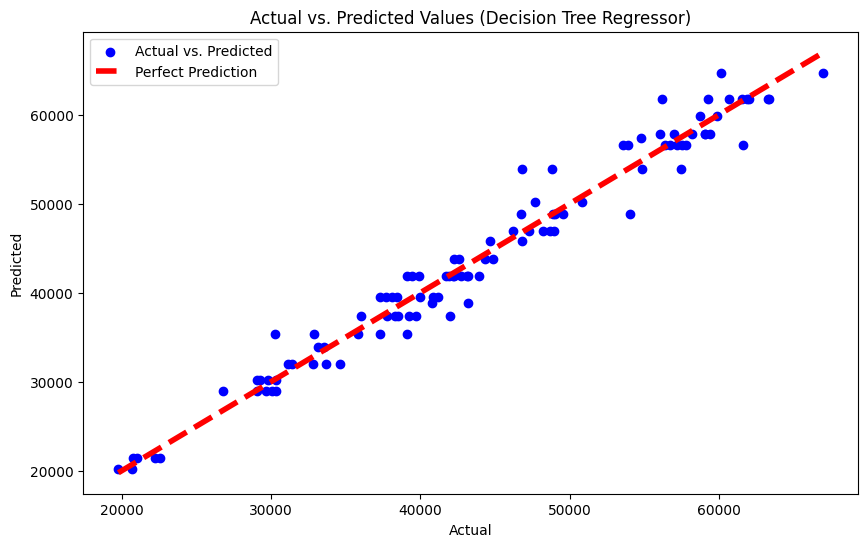

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test["Close"], y_pred_final[0], color='blue', label='Actual vs. Predicted')
plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Decision Tree Regressor)')
plt.legend()
plt.show()

In [79]:
# Print feature importances
feature_importances_dt = best_tree_reg.feature_importances_
print("Feature Importances(Decision Tree):")
for feature_name, importance in zip(X.columns, feature_importances_dt):
    print(f"{feature_name}: {importance}")

Feature Importances(Decision Tree):
Open: 0.9979695809053443
polarity: 0.0
subjectivity: 0.002030419094655686
Compound: 0.0


# 2.) Random Forest Regression

In [84]:
# Define the model
rf_reg = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10,20,30,40,50,60,70],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [12,10, 9,11],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train["y_scaled"])

# Get the best model
best_rf_reg = grid_search.best_estimator_

# Evaluate the model
# y_pred_train = best_rf_reg.predict(X_train)
y_pred_test = best_rf_reg.predict(X_test)
y_pred_final = scaler2.inverse_transform([y_pred_test])

# mse_train_rf = mean_squared_error(y_train, y_pred_train)
mae_test_rf = mean_absolute_error(y_test["Close"].to_list(), y_pred_final[0])
print("Random Forest Regressor Results")
print("-------------------------------------------------------------------------------------------")
print("Best parameters found:", grid_search.best_params_)
# print("Train MSE:", mse_train_rf)
print("Test MAE:", mae_test_rf)
print("-------------------------------------------------------------------------------------------")

Random Forest Regressor Results
-------------------------------------------------------------------------------------------
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}
Test MAE: 1397.7672555051945
-------------------------------------------------------------------------------------------


/tmp/ipykernel_33/2010527099.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')


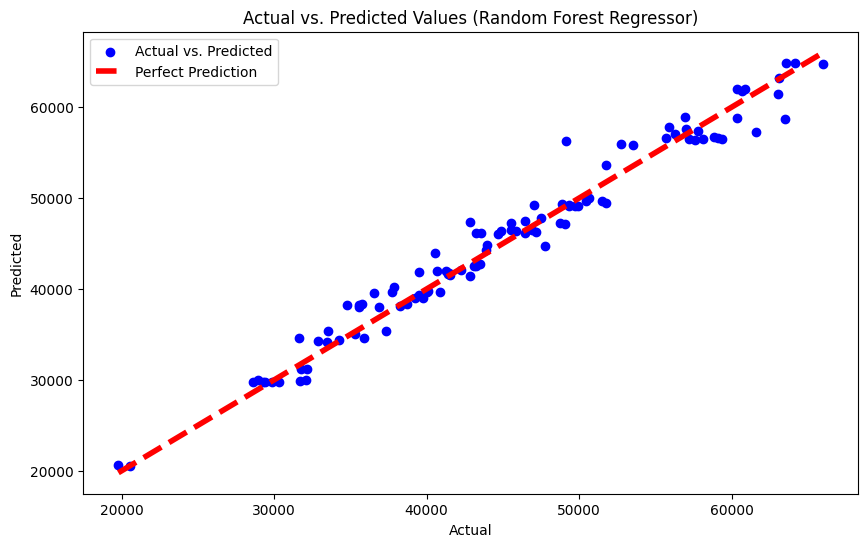

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test["Close"], y_pred_final[0], color='blue', label='Actual vs. Predicted')
plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.legend()
plt.show()

In [95]:
# Print feature importances
feature_importances_rf = best_rf_reg.feature_importances_
print("Feature Importances:")
for feature_name, importance in zip(X.columns, feature_importances_rf):
    print(f"{feature_name}: {importance}")

Feature Importances:
Open: 0.9964155380831549
polarity: 0.0006519187358323263
subjectivity: 0.002179011669555458
Compound: 0.0007535315114572089


# 3.) Gradient Boosting Regression

In [97]:
# Define the model
gb_reg = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2,0.3,0.4,0.5,0.6],
    'max_depth': [3, 5, 7, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(gb_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train["y_scaled"])

# Get the best model
best_gb_reg = grid_search.best_estimator_

# Evaluate the model
y_pred_train = best_gb_reg.predict(X_train)
y_pred_test = best_gb_reg.predict(X_test)
y_pred_final = scaler2.inverse_transform([y_pred_test])
# mse_train_gb = mean_squared_error(y_train, y_pred_train)
mae_test_gb = mean_absolute_error(y_test["Close"].to_list(), y_pred_final[0])
print("Gradient Boosting Regressor Results")
print("-------------------------------------------------------------------------------------------")
print("Best parameters found:", grid_search.best_params_)
# print("Train MAE:", mae_train_gb)
print("Test MAE:", mae_test_gb)
print("-------------------------------------------------------------------------------------------")

Gradient Boosting Regressor Results
-------------------------------------------------------------------------------------------
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Test MAE: 1157.843673765442
-------------------------------------------------------------------------------------------


/tmp/ipykernel_33/2030636752.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')


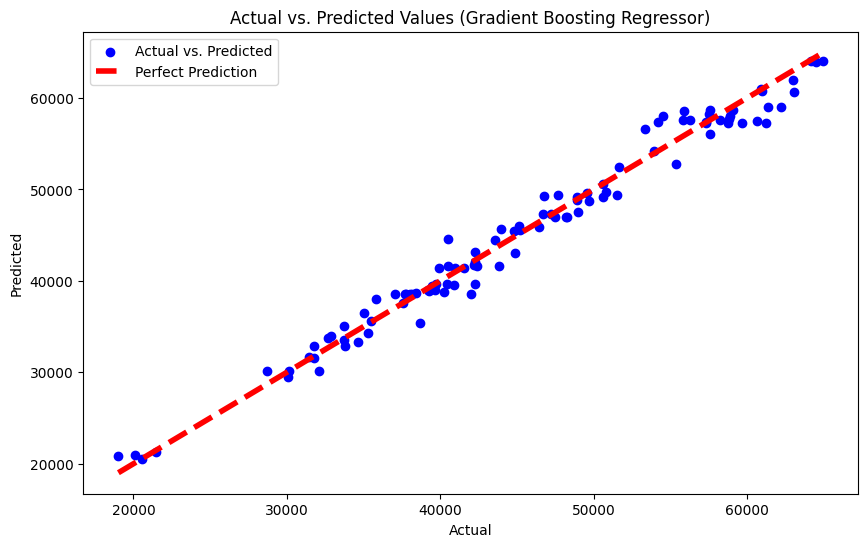

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test["Close"], y_pred_final[0], color='blue', label='Actual vs. Predicted')
plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.legend()
plt.show()

In [105]:
# Print feature importances
feature_importances_gb = best_gb_reg.feature_importances_
print("Feature Importances:")
for feature_name, importance in zip(X.columns, feature_importances_gb):
    print(f"{feature_name}: {importance}")

Feature Importances:
Open: 0.9967198996032248
polarity: 0.0006296142485917495
subjectivity: 0.001770402693086437
Compound: 0.0008800834550968199


# 4.) XG Boost

In [100]:
# Define the XGBoost Regressor model
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=55)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [2.1,0.2,0.3,0.4,0.5,0.6,0.7],
    'max_depth': [3, 5, 7, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(xgb_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train["y_scaled"])

# Get the best model
best_xgb_reg = grid_search.best_estimator_

# Evaluate the model
# y_pred_train = best_xgb_reg.predict(X_train)
y_pred_test = best_xgb_reg.predict(X_test)
y_pred_final = scaler2.inverse_transform([y_pred_test])
# mse_train_xgb = mean_squared_error(y_train, y_pred_train)
mae_test_xgb = mean_absolute_error(y_test["Close"].to_list(), y_pred_final[0])
print("XGBoost Regressor Results")
print("-------------------------------------------------------------------------------------------")
print("Best parameters found:", grid_search.best_params_)
# print("Train MSE:", mse_train_xgb)
print("Test MAE:", mae_test_xgb)
print("-------------------------------------------------------------------------------------------")

XGBoost Regressor Results
-------------------------------------------------------------------------------------------
Best parameters found: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Test MAE: 1413.206329321361
-------------------------------------------------------------------------------------------


/tmp/ipykernel_33/3076867059.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')


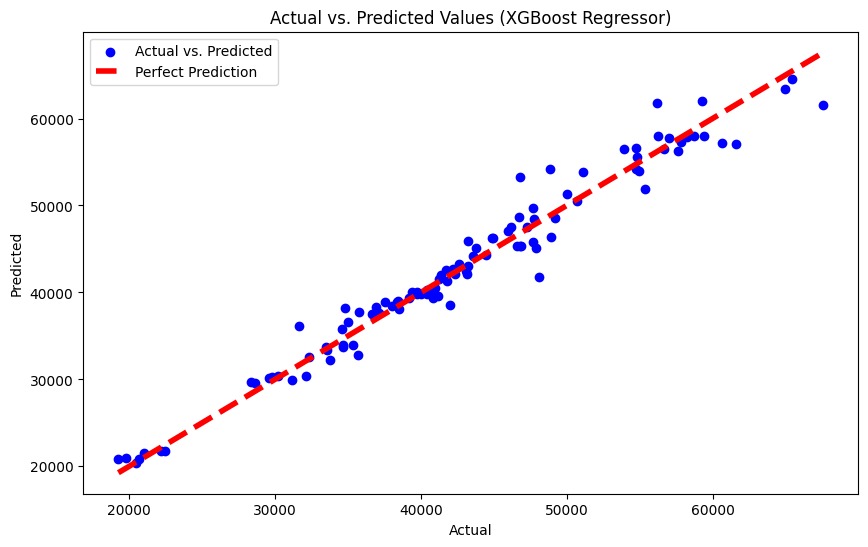

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test["Close"], y_pred_final[0], color='blue', label='Actual vs. Predicted')
plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (XGBoost Regressor)')
plt.legend()
plt.show()

In [103]:
# Print feature importances
feature_importances_xgb = best_xgb_reg.feature_importances_
print("Feature Importances:")
for feature_name, importance in zip(X.columns, feature_importances_xgb):
    print(f"{feature_name}: {importance}")

Feature Importances:
Open: 0.9833877086639404
polarity: 0.0037137672770768404
subjectivity: 0.006975247524678707
Compound: 0.00592326233163476


# 5.) LSTM

In [136]:
# Assuming final_df is your dataset
# Extract features and target variable
from tensorflow.keras.regularizers import L2
from tensorflow.keras.initializers import GlorotUniform  # Example initializer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

X = final_df[['Open', 'polarity', 'subjectivity', 'Compound']].values
y = final_df['Close'].values

scaler2 = MinMaxScaler()
final_df["y_scaled"] = scaler2.fit_transform(final_df[["Close"]])
y = final_df['y_scaled'].values

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets (assuming time-series data)
train_size = int(len(X_scaled) * 0.8)
test_size = len(X_scaled) - train_size
X_train, X_test = X_scaled[0:train_size,:], X_scaled[train_size:len(X_scaled),:]
y_train, y_test = y[0:train_size], y[train_size:len(y)]
dummy = final_df[["Close"]].values[train_size:len(y)]
# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

# Reshape data for LSTM (add look back)
look_back = 3
X_train, y_train = create_dataset(X_train, look_back)
X_test, y_test = create_dataset(X_test, look_back)

print("Creating")
# Define the LSTM model
model = Sequential()
initializer = GlorotUniform()  # You can replace this with any other initializer you prefer
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_initializer="glorot_uniform"))
model.add(Dropout(0.2))
model.add(LSTM(units=100, kernel_regularizer=L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=16))
model.add(Dense(units=1))

#add kernal initialization, regularisaton, batchnorm layer.

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Change
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
 
# Train the model
# model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2)
print("Training")
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2, validation_data=(X_test, y_test), callbacks=[early_stopping])


# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
# train_predict = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], train_predict), axis=1))[:, -1]
# y_train = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], y_train.reshape(-1,1)), axis=1))[:, -1]
# test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], test_predict), axis=1))[:, -1]
# y_test = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1,1)), axis=1))[:, -1]

# # Calculate MSE
# train_mse = mean_squared_error(y_train, train_predict)
# test_mse = mean_squared_error(y_test, test_predict)
# print("Train MSE:", train_mse)
# print("Test MSE:", test_mse)

Creating
Training
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


404/404 - 6s - 14ms/step - loss: 0.1789 - val_loss: 0.0331
Epoch 2/100
404/404 - 5s - 11ms/step - loss: 0.0257 - val_loss: 0.0587
Epoch 3/100
404/404 - 2s - 5ms/step - loss: 0.0238 - val_loss: 0.0349
Epoch 4/100
404/404 - 3s - 6ms/step - loss: 0.0235 - val_loss: 0.0244
Epoch 5/100
404/404 - 2s - 5ms/step - loss: 0.0228 - val_loss: 0.0255
Epoch 6/100
404/404 - 2s - 5ms/step - loss: 0.0219 - val_loss: 0.0445
Epoch 7/100
404/404 - 2s - 5ms/step - loss: 0.0219 - val_loss: 0.0285
Epoch 8/100
404/404 - 3s - 6ms/step - loss: 0.0212 - val_loss: 0.0225
Epoch 9/100
404/404 - 2s - 5ms/step - loss: 0.0222 - val_loss: 0.0296
Epoch 10/100
404/404 - 2s - 5ms/step - loss: 0.0206 - val_loss: 0.0452
Epoch 11/100
404/404 - 2s - 5ms/step - loss: 0.0207 - val_loss: 0.0248
Epoch 12/100
404/404 - 2s - 6ms/step - loss: 0.0211 - val_loss: 0.0312
Epoch 13/100
404/404 - 2s - 5ms/step - loss: 0.0219 - val_loss: 0.0283
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 8.
13/13 ━━━━━━

In [141]:
dummy = final_df[["Close"]].values[train_size:len(y)]

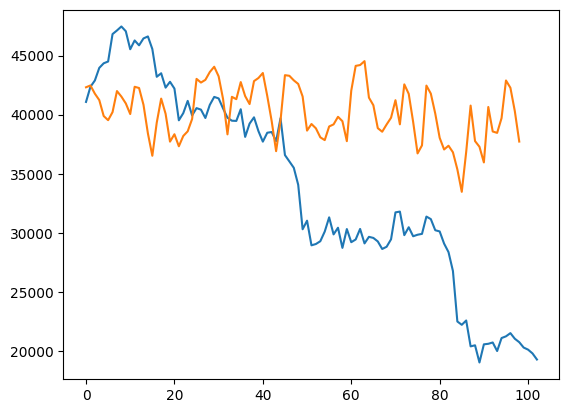

In [145]:
plt.plot(dummy)
plt.plot(a)

In [ ]:
# Fit the scaler on the 'Close' column only
scaler.fit(final_df[['Close']])
# Create DataFrame to store predicted and actual values
results_df = pd.DataFrame({'Date': final_df.index[-len(y_test):], 
                           'Actual_Close': y_test, 
                           'Predicted_Close': test_predict})
actual_prices_np = results_df['Actual_Close'].to_numpy().reshape(-1, 1)
predicted_prices_np = results_df['Predicted_Close'].to_numpy().reshape(-1, 1)
# Inverse transform predicted and actual prices
actual_prices = scaler.inverse_transform(actual_prices_np)
predicted_prices = scaler.inverse_transform(predicted_prices_np)

# Update DataFrame with actual and predicted prices
results_df['Actual_Close'] = actual_prices.flatten()
results_df['Predicted_Close'] = predicted_prices.flatten()

# Print the updated DataFrame
print(results_df)

In [ ]:
# Calculate feature importances
lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

# Create a dictionary to store feature importances
importance_dict = {'Open': feature_importances[0],
                   'polarity': feature_importances[1],
                   'subjectivity': feature_importances[2],
                   'Compound': feature_importances[3]}

# Sort feature importances by importance
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print the sorted feature importances
for feature, importance in sorted_importance_dict.items():
    print(f"{feature}: {importance}")

In [106]:
# Create individual DataFrames for each model
df_dt = pd.DataFrame({'Model': ['Decision Tree'], 'Open': feature_importances_dt[0], 
                      'polarity': feature_importances_dt[1], 'subjectivity': feature_importances_dt[2],
                      'Compound': feature_importances_dt[3]})
df_rf = pd.DataFrame({'Model': ['Random Forest'], 'Open': feature_importances_rf[0], 
                      'polarity': feature_importances_rf[1], 'subjectivity': feature_importances_rf[2],
                      'Compound': feature_importances_rf[3]})
df_gb = pd.DataFrame({'Model': ['Gradient Boosting'], 'Open': feature_importances_gb[0], 
                      'polarity': feature_importances_gb[1], 'subjectivity': feature_importances_gb[2],
                      'Compound': feature_importances_gb[3]})
df_xgb = pd.DataFrame({'Model': ['XGBoost'], 'Open': feature_importances_xgb[0], 
                       'polarity': feature_importances_xgb[1], 'subjectivity': feature_importances_xgb[2],
                       'Compound': feature_importances_xgb[3]})

# Concatenate the individual DataFrames
features_df = pd.concat([df_dt, df_rf, df_gb, df_xgb], ignore_index=True)

# Print the combined DataFrame
print(features_df) 

               Model      Open  polarity  subjectivity  Compound
0      Decision Tree  0.997970  0.000000      0.002030  0.000000
1      Random Forest  0.996416  0.000652      0.002179  0.000754
2  Gradient Boosting  0.996720  0.000630      0.001770  0.000880
3            XGBoost  0.983388  0.003714      0.006975  0.005923


In [103]:
# Calculate the weighted average for each feature
weighted_avg_open = (features_df['Open'].iloc[0] * mae_test_dt + features_df['Open'].iloc[1] * mae_test_rf +
                     features_df['Open'].iloc[2] * mae_test_gb + features_df['Open'].iloc[3] * mae_test_xgb) / \
                    (mae_test_dt + mae_test_rf + mae_test_gb + mae_test_xgb)

weighted_avg_polarity = (features_df['polarity'].iloc[0] * mae_test_dt + features_df['polarity'].iloc[1] * mae_test_rf +
                         features_df['polarity'].iloc[2] * mae_test_gb + features_df['polarity'].iloc[3] * mae_test_xgb) / \
                        (mae_test_dt + mae_test_rf + mae_test_gb + mae_test_xgb)

weighted_avg_subjectivity = (features_df['subjectivity'].iloc[0] * mae_test_dt + features_df['subjectivity'].iloc[1] * mae_test_rf +
                             features_df['subjectivity'].iloc[2] * mae_test_gb + features_df['subjectivity'].iloc[3] * mae_test_xgb) / \
                            (mae_test_dt + mae_test_rf + mae_test_gb + mae_test_xgb)

weighted_avg_Compound = (features_df['Compound'].iloc[0] * mae_test_dt + features_df['Compound'].iloc[1] * mae_test_rf +
                         features_df['Compound'].iloc[2] * mae_test_gb + features_df['Compound'].iloc[3] * mae_test_xgb) /\
                        (mae_test_dt + mae_test_rf + mae_test_gb + mae_test_xgb)

# Create a DataFrame to store the weighted average
weighted_avg_df = pd.DataFrame({'Feature': ['Open', 'polarity', 'subjectivity', 'Compound'],
                                'Weighted_Average': [weighted_avg_open, weighted_avg_polarity,
                                                     weighted_avg_subjectivity, weighted_avg_Compound]})

# Print the weighted average DataFrame
print(weighted_avg_df)

        Feature  Weighted_Average
0          Open          0.990253
1      polarity          0.001775
2  subjectivity          0.004915
3      Compound          0.003057


In [104]:
df1_selected.columns

Index(['polarity', 'subjectivity', 'Compound'], dtype='object')

In [106]:
# Calculate the weighted importance for each feature
df1_selected.loc[:, 'polarity'] *= weighted_avg_polarity
df1_selected.loc[:, 'subjectivity'] *= weighted_avg_subjectivity
df1_selected.loc[:, 'Compound'] *= weighted_avg_Compound

In [107]:
# Assuming your DataFrame is named df and you want to save it as 'output.csv'
df1_selected.to_csv('/kaggle/working/tweets_weighted_sentiments_final.csv', index=False)